# TP 3 - Big Data 

## Parte I

### Ejercicio 1

### Ejercicio 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
import statsmodels.api as sm

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [2]:
EPH_hogar = pd.read_excel('usu_hogar_T123.xlsx')
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,1,43,S,4,664,1,...,12.0,NaN,12,0,96,0,98,0,0,0
1,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,1,43,S,4,1410,2,...,12.0,NaN,12,0,1,2,98,0,0,0
2,TQRMNOPPQHJMLOCDEHPJB00795718,2023,1,1,1,40,S,29,380,1,...,4.0,NaN,5,590,3,0,2,4,0,0
3,TQRMNOPPQHJNLPCDEHJGH00793308,2023,1,1,1,40,S,23,262,1,...,2.0,NaN,2,262,2,0,98,0,0,0
4,TQRMNOPPQHJNLTCDEFKID00798140,2023,1,1,1,43,S,4,859,1,...,5.0,NaN,4,1250,1,2,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16810,TQUMNOVXQHMOMOCDEFKID00798588,2023,1,1,1,43,S,4,824,1,...,1.0,NaN,1,1327,1,2,98,0,0,0
16811,TQVMNOQPWHJLKRCDEFKID00793222,2023,1,1,1,43,S,4,924,3,...,4.0,NaN,3,1032,1,0,98,0,0,0
16812,TQVMNOQXPHJOKOCDEGLDF00800077,2023,1,1,1,41,N,15,69,2,...,NaN,7.0,9,82,1,0,3,0,0,0
16813,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,1,41,N,15,169,2,...,NaN,2.0,2,172,1,0,2,3,0,0


In [3]:
EPH_hogar = EPH_hogar.drop(EPH_hogar[(EPH_hogar["AGLOMERADO"] != 32) & (EPH_hogar["AGLOMERADO"] != 33)].index)
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
5,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,S,33,1667,1,...,5.0,NaN,5,4580,2,3,98,0,0,0
13,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,S,33,3577,1,...,2.0,NaN,2,5915,1,2,3,6,0,0
23,TQRMNOPPQHLNKTCDEIIAD00780107,2023,1,1,1,1,S,32,3536,2,...,8.0,NaN,6,5949,1,0,98,0,0,0
26,TQRMNOPPQHLOKTCDEIJAH00719666,2023,1,1,1,1,S,33,196,1,...,8.0,NaN,9,228,1,0,98,0,0,0
29,TQRMNOPPQHMKLSCDEIIAD00801791,2023,1,1,1,1,S,32,80,2,...,7.0,NaN,4,114,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,TQTMNORTQHLMNUCDEIJAH00793701,2023,1,1,1,1,S,33,1679,2,...,6.0,NaN,7,2754,2,0,1,0,0,0
16786,TQTMNORTYHJOPMCDEIJAH00794674,2023,1,1,1,1,S,33,3441,2,...,12.0,NaN,12,0,1,0,2,0,0,0
16801,TQUMNOQQUHKNRUCDEIJAH00780938,2023,1,1,1,1,S,33,852,2,...,12.0,NaN,12,0,2,0,98,0,0,0
16802,TQUMNOQTRHKMPSCDEIJAH00801913,2023,1,1,1,1,S,33,2264,1,...,1.0,NaN,1,2397,1,0,97,0,0,0


### Ejercicio 3.

In [4]:
EPH_individual = pd.read_excel('usu_individual_T123.xlsx')
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,1,1,43,S,4,664,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,2,1,43,S,4,664,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,1,1,43,S,4,1410,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,2,1,43,S,4,1410,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
4,TQRMNOPPQHJMLOCDEHPJB00795718,2023,1,1,1,1,40,S,29,380,...,NaN,8,51660.00,4,4.0,5,4.0,NaN,5,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48633,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,2,1,41,N,15,169,...,2.0,2,26666.67,2,2.0,2,NaN,2.0,2,172
48634,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,3,1,41,N,15,169,...,2.0,2,26666.67,2,2.0,2,NaN,2.0,2,172
48635,TQVMNOVXQHMOMOCDEFKID00798676,2023,1,1,1,1,43,S,4,1115,...,NaN,8,94000.00,7,7.0,7,7.0,NaN,6,1841
48636,TQVMNOVXQHMOMOCDEFKID00798676,2023,1,1,2,1,43,S,4,1115,...,NaN,8,94000.00,7,7.0,7,7.0,NaN,6,1841


In [5]:
EPH_individual = EPH_individual.drop(EPH_individual[(EPH_individual["AGLOMERADO"] != 32) & (EPH_individual["AGLOMERADO"] != 33)].index)
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
17,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
18,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
19,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
20,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
35,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,S,33,3577,...,NaN,6,32433.33,2,NaN,2,2.0,NaN,2,5915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48607,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48608,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48609,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48610,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955


In [6]:
EPH = EPH_individual.merge(EPH_hogar, on = ["CODUSU", "NRO_HOGAR"], how='left')
EPH

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,COMPONENTE,H15,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,...,GDECCFR_y,PDECCFR_y,ADECCFR_y,PONDIH_y,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,S,33,1667,...,5.0,NaN,5,4580,2,3,98,0,0,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,S,33,1667,...,5.0,NaN,5,4580,2,3,98,0,0,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,S,33,1667,...,5.0,NaN,5,4580,2,3,98,0,0,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,S,33,1667,...,5.0,NaN,5,4580,2,3,98,0,0,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,S,33,3577,...,2.0,NaN,2,5915,1,2,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,S,33,1467,...,4.0,NaN,5,2955,1,7,98,0,0,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,S,33,1467,...,4.0,NaN,5,2955,1,7,98,0,0,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,S,33,1467,...,4.0,NaN,5,2955,1,7,98,0,0,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,S,33,1467,...,4.0,NaN,5,2955,1,7,98,0,0,0


In [7]:
#Eliminamos de la base las que termine en _y pues son las duplicadas
#Eliminamos el _x de las variables
EPH = EPH.loc[:, ~EPH.columns.str.endswith('_y')]
EPH = EPH.rename(columns={col: col.rstrip('_x') if col.endswith('_x') else col for col in EPH.columns})
EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,S,33,3577,...,2,6,2,4,1,2,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0


### Ejercicio 4.

In [8]:
def drop_object_columns(df):
    # Get the list of column names with data type 'object'
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Drop the 'object' columns from the DataFrame
    df = df.drop(columns=object_columns)
    
    return df

def drop_columns_with_nulls(df, threshold=0.7):
    # Calculate the threshold for null values
    null_threshold = len(df) * threshold

    # Check for columns with null values exceeding the threshold
    high_null_columns = df.columns[df.isnull().sum() > null_threshold]

    # Drop the columns with high null values
    df = df.drop(columns=high_null_columns)

    return df

### Ejercicio 5.

In [9]:
#Estudiamos algunas variables que creemos pueden ser relevantes
print(EPH['IV1'].value_counts())
print(EPH['IV2'].value_counts())
print(EPH['IV5'].value_counts())
print(EPH['II7'].value_counts())
print(EPH['IV8'].value_counts())
print(EPH['IV4'].value_counts())
print(EPH['IV3'].value_counts())
print(EPH['IV10'].value_counts())
print(EPH['IX_TOT'].value_counts())

1    5235
2    2330
4      25
6      17
3      12
Name: IV1, dtype: int64
3     3052
2     1822
4     1545
1      517
5      462
6      126
7       77
8       13
9        3
99       2
Name: IV2, dtype: int64
1    6408
2    1211
Name: IV5, dtype: int64
1    4860
3    1383
2     606
6     425
4     164
8      85
7      33
5      31
9      29
0       3
Name: II7, dtype: int64
1    7601
2      18
Name: IV8, dtype: int64
2    2542
4    2108
1    1381
3     769
9     736
5      79
7       2
6       2
Name: IV4, dtype: int64
1    6701
2     892
3      15
4      11
Name: IV3, dtype: int64
1    6898
2     699
0      18
3       4
Name: IV10, dtype: int64
4     1884
3     1620
2     1456
5     1000
1      650
6      516
7      217
9      108
8       80
10      40
12      24
13      13
11      11
Name: IX_TOT, dtype: int64


In [10]:
#Eliminamos columnas con todos nulos
EPH = drop_columns_with_nulls(EPH, threshold=0.5)

#Eliminamos filas con valores sin sentido

#Eliminamos valores de EDADES (CH06) menores que 0
EPH = EPH.drop(EPH[EPH["CH06"] < 0].index)

#Eliminamos valores de TIPO DE UNION (CH07) igual a 9 
EPH = EPH.drop(EPH[EPH["CH07"] == 9].index)

#Eliminamos valores de Cobertura Medica (CH08) igual a 9 que es no sabe no responde
EPH = EPH.drop(EPH[EPH["CH08"] == 9].index)

#Eliminamos valores de INGRESOS (P47T) menores que 0
EPH = EPH.drop(EPH[EPH["P47T"] < 0].index)

#Eliminamos valores de INGRESOS TOTALES FAMILIARES(ITF) menores que 0
EPH = EPH.drop(EPH[EPH["ITF"] < 0].index)

#Eliminamos 99 de la variable IV2 que indica cantidad de ambientes
EPH = EPH.drop(EPH[EPH["IV2"] == 99].index)

#Eliminamos 0 de la variable II2 que indica que la cantidad de ambientes donde duermen es 0
#Util para poder calcular hacinamiento luego
EPH = EPH.drop(EPH[EPH["II2"] == 0].index)

#Reemplazamos valores de MAS_500 por 0 y 1
EPH['MAS_500'] = EPH['MAS_500'].replace('N', 0)
EPH['MAS_500'] = EPH['MAS_500'].replace('S', 1)

#Aplicamos funcion drop object

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,6,2,4,1,2,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0


In [11]:
EPH.IX_TOT

0       4
1       4
2       4
3       4
4       6
       ..
7614    7
7615    7
7616    7
7617    7
7618    7
Name: IX_TOT, Length: 5959, dtype: int64

### Ejercicio 6.

In [12]:
#Armamos una variable para medir hacinamiento pues consideramos es una variable útil para estimar pobreza
EPH["indice_hacinam"]=(EPH["IX_TOT"]/EPH["II2"])
EPH['hacinamiento'] = EPH['indice_hacinam'].apply(lambda x: 1 if x > 2.5 else 0)
EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1.333333,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1.333333,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1.333333,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1.333333,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,4,1,2,3,6,0,0,6.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,1.750000,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,1.750000,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,1.750000,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,1,6,1,7,98,0,0,0,1.750000,0


In [13]:
from sklearn.preprocessing import StandardScaler

#Obtenemos las estadísticas descriptivas

#1: IV12_3: vivienda ubicada en villa de emergencia
#2: Hacinamiento
#3: IV3: Material del suelo
#4: IV10: Condicion del baño (inodoro)
#5: IV6: Acceso al agua

estad_descrip=EPH[["IV12_3", "hacinamiento", "IV3", "IV10", "IV6"]]
estad_descrip.describe().T

,count,mean,std,min,25%,50%,75%,max
IV12_3,5959.0,1.994294,0.075326,1.0,2.0,2.0,2.0,2.0
hacinamiento,5959.0,0.156906,0.363742,0.0,0.0,0.0,0.0,1.0
IV3,5959.0,1.134586,0.359978,1.0,1.0,1.0,1.0,4.0
IV10,5959.0,1.095654,0.302023,0.0,1.0,1.0,1.0,3.0
IV6,5959.0,1.028864,0.177179,1.0,1.0,1.0,1.0,3.0


### Ejercicio 7.

In [14]:
#Creamos una nueva columna donde agregamos un string de texto que contenga las comibinación de sexo y edad
EPH["sexo_edad"] = EPH["CH04"].astype(str) + "_" + EPH["CH06"].astype(str)

#Creamos las variables sexo y edad que pueden tomar cada uno de los valores posibles y 
#luego generamos todas las combinaciones posibles de sexo-edad
sexo = pd.Series([1, 2])
edad = pd.Series(range(104))
sexo_edad=[]
for i in sexo:
    for j in edad:
        sexo_edad.append(f"{i}_{j}")
sexo_edad

#Creamos un dataframe llamado Valores que tendrá las combinaciones posibles de sexo-edad
Valores=pd.DataFrame({'sexo_edad':sexo_edad})

#Creamos un vector con los valores de equivalencias respetando el orden del diccionario anterior
adulto_equiv= [0.35,	 0.37,	 0.46,	 0.51,	 0.55,	 0.6,	 0.64,	 0.66,	 0.68,	 
              0.69,	 0.79,	 0.82,	 0.85,	 0.9,	 0.96,	 1.0,	 1.03,	 1.04,	 
              1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 
              1.02,	 1.02,	 1.02,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.35,	 0.37,	 0.46,	 0.51,	 
              0.55,	 0.60,	 0.64,	 0.66,	 0.68,	 0.69,	 0.70,	 0.72,	 0.74,	 
              0.76,	 0.76,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63]

#Agregamos a nuestro dataframe dichas equivalencias
Valores["adulto_equiv"]=adulto_equiv

EPH = EPH.merge(Valores, how="left")

#A continuación sumamos el valor de equivalencia sexo-edad para cada uno de los hogares y lo almacenamos en una nueva variable que llamamos ad_equiv_hogar
ad_equiv_hogar = EPH.groupby(by="CODUSU").agg({"adulto_equiv":"sum"}).reset_index()
ad_equiv_hogar = ad_equiv_hogar.rename(columns={"adulto_equiv": "ad_equiv_hogar"})


#Nuevamente, agregamos esta nueva variable al dataframe anterior combinando por numero de hogar
EPH = EPH.merge(ad_equiv_hogar, how="left")

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento,sexo_edad,adulto_equiv,ad_equiv_hogar
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,3,98,0,0,0,1.333333,0,1_56,1.10,3.64
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,3,98,0,0,0,1.333333,0,2_50,0.76,3.64
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,3,98,0,0,0,1.333333,0,2_25,0.76,3.64
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,3,98,0,0,0,1.333333,0,1_22,1.02,3.64
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,3,6,0,0,6.000000,1,2_40,0.77,4.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,7,98,0,0,0,1.750000,0,1_28,1.02,5.73
5955,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,7,98,0,0,0,1.750000,0,2_13,0.76,5.73
5956,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,7,98,0,0,0,1.750000,0,1_12,0.85,5.73
5957,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,7,98,0,0,0,1.750000,0,1_6,0.64,5.73


### Ejercicio 8.

In [15]:
respondieron= EPH[EPH["ITF"]!=0]
respondieron['ITF'].min()

2500

In [16]:
norespondieron= EPH[EPH["ITF"]==0]
norespondieron['ITF'].sum()

0

In [17]:
respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]
respondieron

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/3157423302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII2_1,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,98,0,0,0,1.333333,0,1_56,1.10,3.64,208830.6220
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,98,0,0,0,1.333333,0,2_50,0.76,3.64,208830.6220
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,98,0,0,0,1.333333,0,2_25,0.76,3.64,208830.6220
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,98,0,0,0,1.333333,0,1_22,1.02,3.64,208830.6220
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,3,6,0,0,6.000000,1,2_40,0.77,4.58,262759.4090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,98,0,0,0,1.750000,0,1_28,1.02,5.73,328736.1165
5955,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,98,0,0,0,1.750000,0,2_13,0.76,5.73,328736.1165
5956,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,98,0,0,0,1.750000,0,1_12,0.85,5.73,328736.1165
5957,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,98,0,0,0,1.750000,0,1_6,0.64,5.73,328736.1165


### Ejercicio 9.

In [18]:
#Creamos una función que clasifique a pobres en función a la  relación entre ingreso total reportado y el necesario
def clasificar_pobreza(row):
    if row["ITF"] < row["ingreso_necesario"]:
        pobre = 1
    else:
        pobre = 0
    return pobre

In [19]:
#Aplicamos la función a nuestro dataframe y visualizamos los resultados
respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)
respondieron

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/1156415633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,0,0,0,1.333333,0,1_56,1.10,3.64,208830.6220,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,0,0,0,1.333333,0,2_50,0.76,3.64,208830.6220,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,0,0,0,1.333333,0,2_25,0.76,3.64,208830.6220,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,0,0,0,1.333333,0,1_22,1.02,3.64,208830.6220,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,6,0,0,6.000000,1,2_40,0.77,4.58,262759.4090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,0,0,0,1.750000,0,1_28,1.02,5.73,328736.1165,0
5955,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,0,0,0,1.750000,0,2_13,0.76,5.73,328736.1165,0
5956,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,0,0,0,1.750000,0,1_12,0.85,5.73,328736.1165,0
5957,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,0,0,0,1.750000,0,1_6,0.64,5.73,328736.1165,0


### Ejercicio 10.

In [20]:
ITF_hogar = respondieron.groupby(by=['CODUSU', 'NRO_HOGAR']).agg({'ITF': 'mean', 'ingreso_necesario': 'mean' ,'PONDIH': 'mean'}).reset_index()
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH
0,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,4580.0
1,TQRMNOPPQHKMQRCDEIJAH00780809,1,194600.0,262759.4090,5915.0
2,TQRMNOPPQHLNKTCDEIIAD00780107,1,410000.0,128511.1520,5949.0
3,TQRMNOPPQHLOKTCDEIJAH00719666,1,120000.0,63108.1550,228.0
4,TQRMNOPPQHMKLSCDEIIAD00801791,1,200000.0,80893.1805,114.0
...,...,...,...,...,...
1604,TQTMNOQWYHKNQLCDEIJAH00785853,1,260000.0,154328.1245,4063.0
1605,TQTMNORQXHMOSQCDEIJAH00802270,1,147000.0,185308.4915,5163.0
1606,TQTMNORTQHLMNUCDEIJAH00793701,1,320000.0,211125.4640,2754.0
1607,TQUMNOQTRHKMPSCDEIJAH00801913,1,27600.0,124495.1785,2397.0


In [21]:
ITF_hogar['pobre'] = ITF_hogar.apply(clasificar_pobreza, axis=1)
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,4580.0,0
1,TQRMNOPPQHKMQRCDEIJAH00780809,1,194600.0,262759.4090,5915.0,1
2,TQRMNOPPQHLNKTCDEIIAD00780107,1,410000.0,128511.1520,5949.0,0
3,TQRMNOPPQHLOKTCDEIJAH00719666,1,120000.0,63108.1550,228.0,0
4,TQRMNOPPQHMKLSCDEIIAD00801791,1,200000.0,80893.1805,114.0,0
...,...,...,...,...,...,...
1604,TQTMNOQWYHKNQLCDEIJAH00785853,1,260000.0,154328.1245,4063.0,0
1605,TQTMNORQXHMOSQCDEIJAH00802270,1,147000.0,185308.4915,5163.0,1
1606,TQTMNORTQHLMNUCDEIJAH00793701,1,320000.0,211125.4640,2754.0,0
1607,TQUMNOQTRHKMPSCDEIJAH00801913,1,27600.0,124495.1785,2397.0,1


In [22]:
#Verificamos la sumatoria de los ponderadores
print(sum(ITF_hogar.PONDIH))

5298743.0


In [23]:
#Definimos una funcion que calcule la tasa de pobreza dada, por un lado, la cantidad de hogares cuyo ITF es menor 
#al ingreso necesario para costear la canasta básica total, por otro, el ponderador PONDIH por hogar
def tasa_pobreza_hogar(pobre, ponderacion):
    tasa_pobreza = sum(pobre * ponderacion)/sum(ponderacion)
    return(tasa_pobreza)

In [24]:
tasa_pobreza_hogar(ITF_hogar['pobre'], ITF_hogar['PONDIH'])

0.29996510493149037

Como podemos ver, la tasa de pobreza estimada por nuestro modelo es de 0.29997. Es decir, aproximádamente 29,997% de los hogares estaban en el primer trimestre, por debajo de la lénea de pobreza. Esta cifra es consistente con la estimación oficial realizada por el INDEC. Esta determina que el porcentaje de hogares pobres en el trimestre estudiado era igual al 29,6%. Por lo tanto, nuestra estimación parecería ser buena en comparación al resultado oficial, siendo la diferencia entre ambas medidas de 0,3997 puntos porcentuales.

## Parte II

### Ejercicio 1.

In [25]:
def evalua_metodo(model, X_train, X_test, y_train, y_test, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    '''
    Esta función evalua un modelo de estimación y devuelve diferentes métricas. 
    Input:
            model: es el nombre del modelo a implementar. Puede tomar los siguientes valores
                'log': modelo logístico
                'lda#': modelo de análisis discriminante lineal con # componentes
                'knn#': modelo de vecinos cercanos con # vecinos
            X_train: particion de la muestra de entrenamiento para predictores 
            y_train: particion de la muestra de entrenamiento para valores a predecir
            X_test: particion de la muestra de testeo para predictores
            y_test: particion de la muestra de testeo para valores a predecir
    Output:
            Verdadero 0: cantidad de verdaderos negativos
            Falso 1: cantidad de falsos positivos
            Falso 0: cantidad de falsos negativos
            Verdadero 1: cantidad de verdaderos positivos
            ROC_Plot: Gráfico de la curva ROC
            AUC: Área debajo de la curva ROC
            Accuracy: nivel de accuracy
    '''
    model1 = model[:3]
    if model1 == 'log':
        m = LogisticRegression(max_iter = hyperparameters['max_iter'], penalty=hyperparameters['penalty'], C=hyperparameters['C'], solver = hyperparameters['solver']).fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'lda':
        components = int(''.join([char for char in model if char.isnumeric()]))
        m = LinearDiscriminantAnalysis(n_components=components)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'knn':
        neighbors = int(''.join([char for char in model if char.isnumeric()]))
        m = KNeighborsClassifier(n_neighbors=neighbors)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    else:
        print('Modelo no especificado correctamente')
    
    results = {}
    
    #Matriz de confusion
    matriz_confusion = confusion_matrix(y_test, y_test_pred)
    tn, fp , fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    results["Verdadero 0"] = tn
    results["Falso 1"] = fp
    results["Falso 0"] = fn
    results["Verdadero 1"] = tp
    
    #Curva ROC
    auc = roc_auc_score(y_test, y_test_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=model)
    display.plot()  
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plot_filename = "roc_curve.png"
    results['ROC_Plot'] = plot_filename
    plt.close()
    
    #AUC
    results['AUC'] = auc
    
    #Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    results['Accuracy'] = accuracy
    
    #ECM
    ecm = mean_squared_error(y_test, y_test_pred)
    results['ECM'] = ecm
    
    #Coefficients
    if model1 == 'knn':
        coef = []
    else:
        coef = m.coef_
        results['Coefficients'] = coef
    return(results)

### Ejercicio 2.

In [26]:
def cross_validation(model, K, X, y, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    ecms = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
    kf = KFold(n_splits=K, shuffle=True, random_state=100)
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
        results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
        ecm = results['ECM']
        ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
    ecms = ecms.astype({"particion":int})
    return(ecms)

### Ejercicio 3.

In [27]:
def evalua_config(model, K, X, y, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    min_ecm = np.Inf
    if model == 'log':
        for i in hyperparam:
            hyperparameters = i
            a = cross_validation(model, K, X, y, hyperparameters)
            ecms = a
            prom = ecms['ecm'].mean()
            if prom < min_ecm:
                min_ecms = prom
                hyper = hyperparameters
            else:
                min_ecms = min_ecms
                hyper = hyper
            return(hyper, min_ecms)
    else:
        return('Modelo no compatible con esta función')

### Ejercicio 4.

In [28]:
def evalua_metodos_multiples(models, X, y, K, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    resultados = pd.DataFrame(columns=["modelo", "hiperparámetros", "Verdadero 0", "Falso 1", "Falso 0", "Verdadero 1", "ROC_Plot", "AUC", "Accuracy", "ECM"])
    for model in models:
        if model == 'log':
            h = evalua_config(model, K, X, y, hyperparam)
            hyperparameters = h[0]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparam)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
    return(resultados)

## Parte III

### Ejercicio 1

In [30]:
#Eliminamos variables de "Ingresos de la ocupacion principal de los asalariados"
respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de la ocupacion principal"
respondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de otras ocupaciones"
respondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total individual"
respondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos no laborales"
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total familiar"
respondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso per cápita familiar"
respondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')

#Eliminamos las columnas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True, errors='ignore')

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/1682715150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/1682715150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/1682715150.py:6: SettingWithCopyWarning: 

In [31]:
respondieron = respondieron.reset_index(drop = True)
norespondieron = norespondieron.reset_index(drop = True)

In [32]:
respondieron

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,indice_hacinam,hacinamiento,sexo_edad,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,2,3,98,0,0,0,1.333333,0,1_56,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,2,3,98,0,0,0,1.333333,0,2_50,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,2,3,98,0,0,0,1.333333,0,2_25,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,2,3,98,0,0,0,1.333333,0,1_22,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,1,2,3,6,0,0,6.000000,1,2_40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,1,7,98,0,0,0,1.750000,0,1_28,0
4164,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,1,7,98,0,0,0,1.750000,0,2_13,0
4165,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,1,7,98,0,0,0,1.750000,0,1_12,0
4166,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,1,7,98,0,0,0,1.750000,0,1_6,0


In [33]:
respondieron1 = respondieron.dropna()
respondieron1 = drop_object_columns(respondieron1)
y = respondieron1['pobre']
X = respondieron1.drop(columns = ['pobre'])
X = sm.add_constant(X)

### Ejercicio 2.

In [34]:
models = ['log', 'lda1', 'knn3']
hyperparam = [{'max_iter':10000, 'penalty': 'l1', 'C': 1, 'solver': 'saga'},
             {'max_iter':10000, 'penalty': 'l2', 'C': 1, 'solver': 'saga'}]
K = 5
evalua_metodos_multiples(models, X, y, K, hyperparam)

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

,modelo,hiperparámetros,Verdadero 0,Falso 1,Falso 0,Verdadero 1,ROC_Plot,AUC,Accuracy,ECM
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",682,84,118,367,roc_curve.png,0.906923,0.838529,0.161471
1,lda1,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",690,76,142,343,roc_curve.png,0.898275,0.825739,0.174261
2,knn3,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",674,92,128,357,roc_curve.png,0.879579,0.824141,0.175859


### Ejercicio 3.

### Ejercicio 4.

En validación cruzada, tenemos un trade-off tanto si elegimos unsar un K grande como un K chico. 

Por un lado, si tomamos un K chico esto implica que estamos dividiendo la muestra en poca cantidad de participaciones, pero dejamos dentro de cada partición una buena cantidad de observaciones. En efecto, maxiziamos la cantidad de datos para estimar nuestro modelo. Sin embargo, la contra de este enfoque es que las estimaciones depederán mucho de valores particulares. Esto puede dificultar ciertos análisis pues podría ser que al añadir nuevas observaciones a la muestra, el modelo sea muy sensible y cambe mucho frente a una pequeña mdoficación. 

Por el otro lado, si elegimos un valor de K grande para dividir nuestra muestra, en cada repetición que tomamos un subgrupos estamos dejando afuera una gran cantidad de particiones  para luego evaluar nuestro modelo. Esto maximiza nuestra cantidad de datos para pdoer evaluar nuestra modelo. No obsante, el modelo en ste caso va a ser estimado de manera menos precisa, pues utilziamos menor cantidad de observaciones para modelar las predicciones en primer lugar. El caso extremno se da cuando igualamos el valor de K a la cantidad de observaciones que tenemos (K = N). Esto se conoce como "Leave one out" y consiste en ir dejando de una obseración afuera para evaluar, usando todas las demás N-1 datos para evaluar. En efecto, el modelo se estima N veces, una para cada vez en que dejamos a cada observación afuera de la estimación.


### Ejercicio 5.

In [35]:
N = list(range(-5, 6))
reg = 'l1'
K = 10
model = 'log'
hyperparam_lasso = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_lasso.append(hyperparameters)

In [36]:
N = list(range(-5, 6))
reg = 'l2'
K = 10
model = 'log'
hyperparam_ridge = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_ridge.append(hyperparameters)

In [37]:
best_lasso = evalua_config(model, K, X, y, hyperparam_lasso)
best_ridge = evalua_config(model, K, X, y, hyperparam_ridge)

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

In [38]:
lamda_lasso = 1/best_lasso[0]['C']
lamda_ridge = 1/best_ridge[0]['C']
print('El lamda óptimo para lasso: ', lamda_lasso)
print('El lamda óptimo para ridge: ', lamda_ridge)

El lamda óptimo para lasso:  1e-05
El lamda óptimo para ridge:  1e-05


In [39]:
N = list(range(-5, 6))
reg = ['l1', 'l2']
K = 10
model = 'log'
punto_5 = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
for r in reg:
    for n in N:
        hyperparam = {'max_iter':10000, 'penalty': r, 'C': 1/(10**n), 'solver': 'saga'}
        resultados = cross_validation(model, K, X, y, hyperparam)
        punto_5 = punto_5.append(resultados)

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/544701107.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5.append(resultados)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

In [40]:
punto_5 = punto_5.reset_index(drop = True)
punto_5

,modelo,hyperparameters,particion,ecm,Coefficients
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",0,0.151079,"[[0.0, 0.0, 0.06181558039810343, -0.5497694722..."
1,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",1,0.189448,"[[0.0, 0.0, 0.03268429146355099, -0.5189609406..."
2,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",2,0.158273,"[[0.0, 0.0, 0.039918943431713975, -0.520128615..."
3,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",3,0.182254,"[[0.0, 0.0, 0.04880509090384454, -0.6159374768..."
4,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",4,0.191847,"[[0.0, 0.0, 0.008570188359827324, -0.601331088..."
...,...,...,...,...,...
215,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",5,0.359712,"[[0.0, 0.0, 0.0004381278191875208, 0.004858711..."
216,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",6,0.386091,"[[0.0, 0.0, 0.00021002830608095059, 0.00474787..."
217,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",7,0.388489,"[[0.0, 0.0, 0.0003223070780155379, 0.004736073..."
218,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",8,0.399038,"[[0.0, 0.0, 0.0004358594911016281, 0.004700354..."


In [41]:
punto_5_2 = pd.concat([punto_5.drop(['hyperparameters'], axis=1), punto_5['hyperparameters'].apply(pd.Series)], axis=1)
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver
0,log,0,0.151079,"[[0.0, 0.0, 0.06181558039810343, -0.5497694722...",10000,l1,100000.00000,saga
1,log,1,0.189448,"[[0.0, 0.0, 0.03268429146355099, -0.5189609406...",10000,l1,100000.00000,saga
2,log,2,0.158273,"[[0.0, 0.0, 0.039918943431713975, -0.520128615...",10000,l1,100000.00000,saga
3,log,3,0.182254,"[[0.0, 0.0, 0.04880509090384454, -0.6159374768...",10000,l1,100000.00000,saga
4,log,4,0.191847,"[[0.0, 0.0, 0.008570188359827324, -0.601331088...",10000,l1,100000.00000,saga
...,...,...,...,...,...,...,...,...
215,log,5,0.359712,"[[0.0, 0.0, 0.0004381278191875208, 0.004858711...",10000,l2,0.00001,saga
216,log,6,0.386091,"[[0.0, 0.0, 0.00021002830608095059, 0.00474787...",10000,l2,0.00001,saga
217,log,7,0.388489,"[[0.0, 0.0, 0.0003223070780155379, 0.004736073...",10000,l2,0.00001,saga
218,log,8,0.399038,"[[0.0, 0.0, 0.0004358594911016281, 0.004700354...",10000,l2,0.00001,saga


In [42]:
punto_5_2['lamda'] = 1/punto_5_2['C']
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.151079,"[[0.0, 0.0, 0.06181558039810343, -0.5497694722...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.189448,"[[0.0, 0.0, 0.03268429146355099, -0.5189609406...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.158273,"[[0.0, 0.0, 0.039918943431713975, -0.520128615...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.182254,"[[0.0, 0.0, 0.04880509090384454, -0.6159374768...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.191847,"[[0.0, 0.0, 0.008570188359827324, -0.601331088...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
215,log,5,0.359712,"[[0.0, 0.0, 0.0004381278191875208, 0.004858711...",10000,l2,0.00001,saga,100000.00000
216,log,6,0.386091,"[[0.0, 0.0, 0.00021002830608095059, 0.00474787...",10000,l2,0.00001,saga,100000.00000
217,log,7,0.388489,"[[0.0, 0.0, 0.0003223070780155379, 0.004736073...",10000,l2,0.00001,saga,100000.00000
218,log,8,0.399038,"[[0.0, 0.0, 0.0004358594911016281, 0.004700354...",10000,l2,0.00001,saga,100000.00000


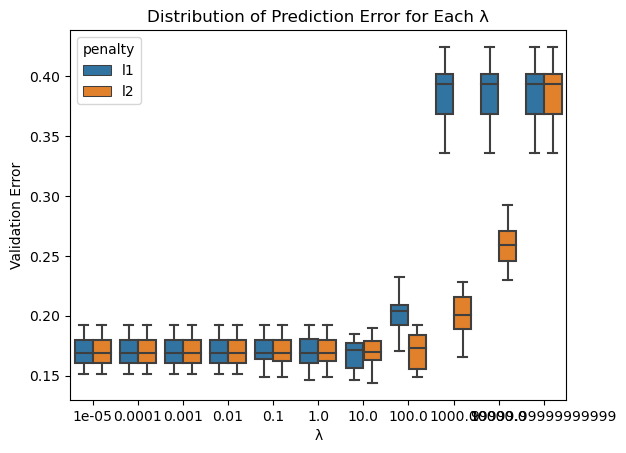

In [43]:
plt.figure()
sns.boxplot(x='lamda', y='ecm', data=punto_5_2, hue='penalty')
plt.title('Distribution of Prediction Error for Each λ')
plt.xlabel('λ')
plt.ylabel('Validation Error')
plt.show()

In [44]:
N = list(range(-5, 6))
K = 10
model = 'log'
punto_5_3 = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
for n in N:
    hyperparam = {'max_iter':10000, 'penalty': 'l1', 'C': 1/(10**n), 'solver': 'saga'}
    resultados = cross_validation(model, K, X, y, hyperparam)
    punto_5 = punto_5_3.append(resultados)

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"mode

/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/205382640.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
/var/folders/_d/vpk_7qjd3l341b3r40fc735w0000gn/T/ipykernel_29014/539482107.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5_3.append